
<a name="T_38F77E06"></a>

# <span style="color:rgb(213,80,0)">МЕТОДЫ ОПТИМИЗАЦИИ</span>
<a name="beginToc"></a>

## Table of Contents
[Семинар 12. Решение задачи метода наименьших квадратов итерационными методами](#H_340DCAC2)

&emsp;[Градиент суммы квадратов и матрица Якоби](#H_8697C602)

&emsp;&emsp;[Градиентный оптимизатор с постоянным шагом](#H_B80CDF3C)

&emsp;&emsp;[Задача линейной регрессии](#H_93F59428)

&emsp;&emsp;[Задача градиентного поиска с подбором длины шага](#H_E0667F4C)

<a name="endToc"></a>
<a name="H_340DCAC2"></a>

## Семинар 12. Решение задачи метода наименьших квадратов итерационными методами
<a name="H_8697C602"></a>

### Градиент суммы квадратов и матрица Якоби

Задача метода наименьших квадратов, состоит в том, чтобы минимизировать квадрат модуля ошибки между результатами измерений и предсказанием модели:

<a name="M_A1E97831"></a>

$$\Phi (\vec{x} )=\frac{1}{2}\vec{r} \cdot \vec{r}$$

Квадрат модуля \- скалярное произведение вектора самого на себя, вектор ошибки  "живет" в пространстве с базисными векторами ${\hat{e} }_j$ , размерность этого пространства равна количеству экспериментальных точек. Вектор $\vec{x}$ \- это вектор параметров оптимизации, он "живет" в пространстве с базисными векторами ${\hat{x} }_i$ . Размерность этого пространства равна количеству переменных оптимизации.


В соотвествии с [формулой](#M_27B507C0) для градиента:


$$\overleftrightarrow{J} =\nabla \vec{r} =\sum_{i,j} \frac{\partial r_j }{\partial x_i }{\hat{x} }_i {\hat{e} }_j$$

Координаты этой диады \-  матрица Якоби.


Таким образом, матрица Якоби \- это матрица, в которой элемент, стоящий на ***i***\-й строке ***j*** \-го столбца \- это значение производной ***j***\-й координаты вектора ошибки по ***i***\-й переменной оптимизации:


$$J_{ij} =\frac{\partial r_j }{\partial x_i }$$

Из формулы для градиента легко видеть, что, если  скалярная функция  представима в виде скалярного произведение некоторых векторов $f=\vec{a} \cdot \vec{b}$ , то:


$$\nabla f=(\nabla \vec{a} )\cdot \vec{b} +\vec{a} \cdot (\nabla \vec{b} )$$

В частности, градиент скалярного  вектора самого на себя будет:


$$\nabla (\vec{r} \cdot \vec{r} )=2((\nabla \vec{r} )\cdot \vec{r} )$$

Тогда градиент квадратичной [невязки](#M_A1E97831):


$$\nabla \Phi (\vec{x} )=(\nabla \vec{r} )\cdot \vec{r}$$

Эта формула  позволяет упростить задачу расчета градиента в тех случаях, когда мы можем посчитать матрицу Якоби аналитически.


На прошлом семинаре мы рассматривали универсальный градиентный оптимизатор, который на входе требовал функцию расчета невязки и функцию расчета градиента. Этот метод был применим для любой скалярной функции.


Сегодня мы делаем оптимизатор, который на входе требует функцию расчета вектора ошибки и функцию расчета матрицы Якоби. Этот оптимизатор применим для задачи наименьших квадратов, то есть, мы в явном виде предполагаем форму скалярной функции.

<a name="H_B80CDF3C"></a>

#### Градиентный оптимизатор с постоянным шагом

Теперь код для поиска минимума функции невязки градиентным методом может выглядеть так (ниже приведена упрощенная версия кода, полный код можно посмотреть в файле  grad\_lsqr.m, который находится в папке с ливскриптом ):

<pre>
function x=grad_lsqr(x0,r,Jac,options)
% оптимизатор методом градиентного поиска, использующий матрицу Якоби
% входные аргументы:
%                   x0 - стартовая точка алгоритма оптимизации [P,1] (P -
%                   число переменных оптимизации)
%                   r - указатель на векорную функцию, которая рассчитывает
%                   вектор r - вектор ошибки, возвращает вектор размером
%                   [N,1] - N - число экспериментальных точек
%                   Jac - указатель на функцию, которая рассчитывает
%                   матрицу Якоби, она возвращает матрицу [P,N]

% выходные аргументы:
%                   x - оптимальное значение вектора параметров оптимизации
%                   (минимизатор)

    arguments
        x0 double
        r function_handle  % функция, которая берет вектор переменных оптимизации и возвращает вектор ошибки
        Jac function_handle % функция, которая рассчитывает матрицу якоби
        options.mu=0.01 % learning rate - длина шага в направлении антиградиента
        options.N = 100 % число итераций
    end

    ii=1;
    residual_vector=r(x0); % вектор ошибки для стартовой точки
    J = Jac(x0); % матрица Якоби для стартовой точки
    Fval = dicrepancy(residual_vector); % значение функции невязки

    % основной цикл поиска
    while ii<N && all(flag) % условия остановки итераций - превышение максимального количества и еще ряд критериев
        x_previous=x;
        F_previous = Fval; % значения коордианты и функции на предыдущей итерации
        grad_value = J*residual_vector; % рассчитываем градиент функции

        grad_norm = norm(grad_value); % модуль градиента
        grad_direction = grad_value/norm(grad_value); % используем только направление градиента

        % рассчитываем координату для следующей точки
        x= x - mu*grad_direction(:);

        % обновляем вектор ошибки
        residual_vector = r(x);
        % обновляем матрицу Якоби
        J = Jac(x);
        Fval=discrepancy(residual_vector); % рассчитываем значение функции для этой координаты

        % флажок проверки сходимости
        flag = convergence_check(Fval,x,grad_norm,ii)
        ii=ii+1;
    end
end
function d = dicrepancy(r)
% функция расчета невязки
    d = 0.5*norm(r)^2;
end
function convergence_check(Fval,x,grad_norm,ii)
    % функция проверки сходится ли алгоритм
    % вопрос проверки сходимости оставим на один из следующих семинаров
end
</pre>
<a name="H_93F59428"></a>

#### Задача линейной регрессии

Рассмотрим на конкретном примере \- задаче линейной регрессии.


Вектор ошибки регрессии (раньше он обозначался $\vec{\epsilon}$ ):


$$\vec{r} =X\vec{b} -\vec{y}$$

Скалярная функция невязки для нее \- это, соотвественно, квадрат модуля вектора ошибки.


Функция невязки в матричной записи:


$$\Phi (\vec{b} )=\frac{1}{2}{\vec{r} }^T \vec{r} =||X\vec{b} -\vec{y} ||^2 =(X\vec{b} -\vec{y} )^T (X\vec{b} -\vec{y} )$$

В диадной записи:


$$\Phi (\vec{b} )=\frac{1}{2}\vec{r} \cdot \vec{r} =||\overleftrightarrow{X} \cdot \vec{b} -\vec{y} ||^2 =(\overleftrightarrow{X} \cdot \vec{b} -\vec{y} )\cdot (\overleftrightarrow{X} \cdot \vec{b} -\vec{y} )$$

Посчитаем градиент этой функции:

<a name="H_29DDFABC"></a>

$$\nabla_b \Phi (\vec{b} )=(\nabla_b \vec{r} )\cdot \vec{r}$$
<a name="M_191612CE"></a>

 $X<=>\overleftrightarrow{X} =\sum_{ij} x_{ij} {\hat{e} }_i {\hat{u} }_j$  \- матрица предикторов


 $\vec{y} =\sum_i y_i {\hat{e} }_i ,\vec{b} =\sum_k b_k {\hat{u} }_k$ \- зависимая переменная


 ${\hat{e} }_i$  \- базисные вектора пространства столбцов  \- то есть, это то пространство, в котором живут все вектора размером с вектор наших измеренных точек, в этом пространстве живут столбцы матрицы предикторов, вектор экспериментальных точек


 ${\hat{u} }_j$ \- базисные вектора пространства строк  \- то есть, это то пространство, в котором живут все вектора размером с вектор коэффициентов, в этом пространстве живет вектор $\vec{b}$


$$\vec{r} =\sum_{ij} x_{ij} {\hat{e} }_i {\hat{u} }_j \cdot \sum_k b_k {\hat{u} }_k -\sum_i y_i {\hat{e} }_i =\sum_{ij} x_{ij} b_j {\hat{e} }_i -\sum_i y_i {\hat{e} }_i$$

 $\nabla_b =\sum_i {\hat{u} }_i \frac{\partial }{\partial_{bi} }$ \- оператор градиента по переменным оптимизации в пространстве переменных оптимизации


$$\nabla_b \vec{r} =\sum_k {\hat{u} }_k \frac{\partial }{\partial_{b_k } }[\sum_{ij} x_{ij} b_j {\hat{e} }_i -\sum_i y_i {\hat{e} }_i ]=\sum_{ij} x_{ij} {\hat{u} }_j {\hat{e} }_i$$

Сравним  матрицу Якоби с [выражением](#M_191612CE) для матрицы предикторов линейной регрессии, видно, что: $J=X^T$


 $\nabla_b \Phi (\vec{b} )=\nabla_b \vec{r} \cdot \vec{r} =\overleftrightarrow{J} \cdot \vec{r}$                                                        (1)


В матричной форме это выражение имеет вид:


$$\nabla \Phi (\vec{b} )=X^T (X\vec{b} -\vec{y} )$$

Если его приравнять к нулю (градиент равен нулю в точке экстремума), то мы получим нормальное уравнение для линейной регрессии: $X^T X\vec{b} =X^T \vec{y}$


Сейчас наша задача состоит в том, чтобы решить это уравнение итерационным методом, мы не будем приравнивать градиент к нулю, а будем искать решение итерационно.


В данном случае матрица якоби  \- постоянная, поэтому для расчета градиента функции невязки нам на каждой итерации надо только посчитать вектор ошибки.


По сравнению с предыдущим семинаром, где для расчета градиента мы исопльзовали простейшую форму численного дифференцирования, теперь мы сделаем новый градиентный оптимизатор, который будет использовать тот факт, что минимизируемая функция  \- это сумма квадратов.


Создание функций


In [1]:

clearvars
x_true =[-0.43; 0.58]; % вектор истинных значений параметров
t_region = [-1,1];
noise = 0;
t = linspace(t_region(1),t_region(2),10)'; % вектор независимых переменных
y = x_true(1) + x_true(2)*t + noise*randn(size(t));% истинные значения параметров оптимизации x_true
%F = @(x)sum(((x(1) + x(2)*t) - y).^2); % воркпейс функции F содержит и экспериментальные и измеренные точки
X = [ones(numel(t),1), t]; % матрица предикторов

residual_function = @(b) (X*b - y)% функция расчета вектора невязки

residual_function = function_handle with value:
    @(b)(X*b-y)

In [2]:
Xt = transpose(X);
Jacobian = @(~)Xt; % функция расчета матрицы Якоби (якобиан в данном случае постоянный)

In [3]:
residual_function_workspace = functions(residual_function)

residual_function_workspace = struct with fields:
            function: '@(b)(X*b-y)'
                type: 'anonymous'
                file: 'C:\Users\user\AppData\Local\Temp\Editor_xzpqt\LiveEditorEvaluationHelperE1826587093.m'
           workspace: {[1x1 struct]}
    within_file_path: ''

In [4]:
% функция functions  возвращает метаданные указателя на функцию

In [5]:
disp("Матрица Якоби:")

Матрица Якоби:

In [6]:
Jacobian([0.1; 0.3])

ans = 2x10    
1.0000    1.0000    1.0000    1.0000    1.0000    1.0000    1.0000    1.0000    1.0000    1.0000
   -1.0000   -0.7778   -0.5556   -0.3333   -0.1111    0.1111    0.3333    0.5556    0.7778    1.0000

In [7]:
disp("Векор ошибки:")

Векор ошибки:

In [8]:
residual_function([0.1; 0.3])

ans = 10x1    
    0.8100
    0.7478
    0.6856
    0.6233
    0.5611
    0.4989
    0.4367
    0.3744
    0.3122
    0.2500

In [9]:
disp("Градиент в точке x_true:")

Градиент в точке x_true:

In [10]:
Jacobian(x_true)*residual_function(x_true)

ans = 2x1    
     0
     0

In [11]:
% запускаем оптимизатор
[xval,fval,iternumber,outflag]=grad_lsqr([0.0; 0.0],residual_function,Jacobian,"mu",1e-2,"N",100000)

xval = 2x1    
   -0.4265
    0.5800
fval = 5.9970e-05
iternumber = 100000
outflag = 1x3 logical array    
   1   1   1

In [12]:
disp("Ошибка фиттинга:" + string(norm(x_true-xval)))

Ошибка фиттинга:0.0034632


Видно, что ошибка определения истинных значений имеет тот же порядок, что и длина шага (**mu**), если мы не уперлись в ограничение на число итераций (**N**).


In [13]:
% сделаем еще прогон, чтобы посмотреть как алгоритм ставит точки
mu=0.05;
[xval,~,~,~,search_history]=grad_lsqr([0.0; 0.0],residual_function,Jacobian,"mu",mu,"N",100)

xval = 2x1    
   -0.4094
    0.5800
search_history = 2x100    
         0   -0.0438   -0.0869   -0.1293   -0.1705   -0.2106   -0.2491   -0.2857   -0.3198   -0.3507   -0.3777   -0.3997   -0.4159   -0.4259   -0.4301   -0.4300   -0.4302   -0.4294   -0.4330   -0.4207   -0.4587   -0.4095   -0.4594   -0.4094   -0.4594   -0.4094   -0.4594   -0.4094   -0.4594   -0.4094   -0.4594   -0.4094   -0.4594   -0.4094   -0.4594   -0.4094   -0.4594   -0.4094   -0.4594   -0.4094   -0.4594   -0.4094   -0.4594   -0.4094   -0.4594   -0.4094   -0.4594   -0.4094   -0.4594   -0.4094
         0    0.0241    0.0494    0.0760    0.1042    0.1341    0.1660    0.2001    0.2367    0.2760    0.3181    0.3630    0.4103    0.4593    0.5091    0.5591    0.6091    0.5591    0.6090    0.5605    0.5931    0.5839    0.5800    0.5800    0.5800    0.5800    0.5800    0.5800    0.5800    0.5800    0.5800    0.5800    0.5800    0.5800    0.5800    0.5800    0.5800    0.5800    0.5800    0.5800    0.5800    0.5800    0.5800    0

In [14]:
% построим анимацию шагов работы алгоритма
ax = get_next_ax();

fig1

In [15]:
animated_Line = animatedline(ax,'Marker',"o",'LineStyle',"-");
for ii=1:size(search_history,2)
    v = search_history(:,ii);
    addpoints(animated_Line,v(1),v(2))
    pause(0.01)
end
% построим контурное изображение функции невязки (чтобы убедиться что
% градиент перпендикулярен линиям постоянного уровня)
x_lim = ax.XLim;
y_lim = ax.YLim;

F_inter = @(x1,x2) residual_function([x1;x2])'*residual_function([x1;x2])/2

F_inter = function_handle with value:
    @(x1,x2)residual_function([x1;x2])'*residual_function([x1;x2])/2

In [16]:

hold(ax,"on");
    plot(x_true(1),x_true(2),"r*","MarkerSize",16);
    fcontour(ax,F_inter,[1.5*x_lim,1.5*y_lim],"LevelStep",0.2); % контурное изображение показывает линии постоянного значения


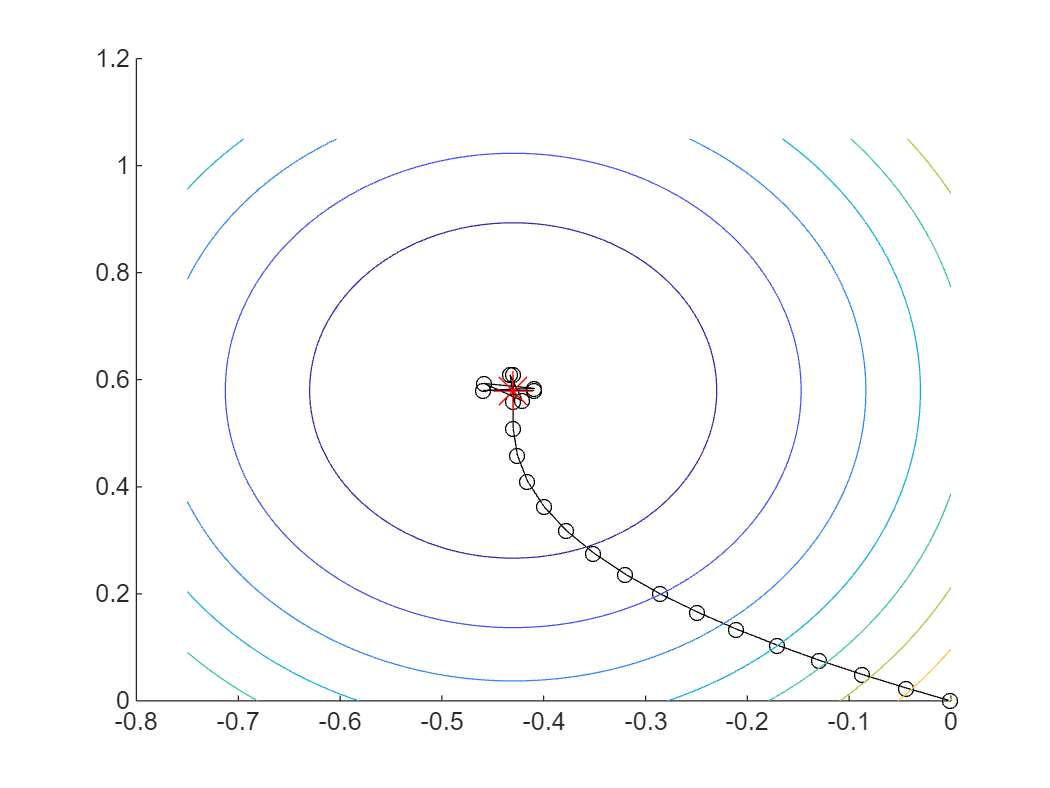

In [17]:
hold(ax,"off");


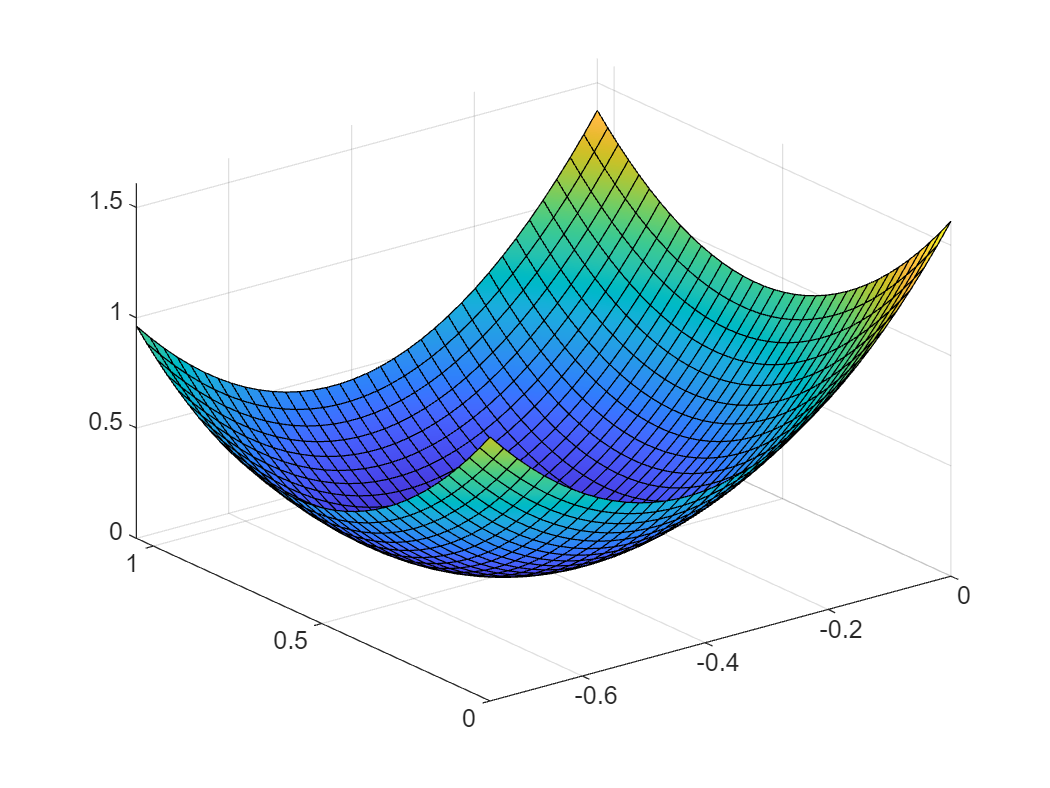

In [18]:
    fsurf(F_inter,[1.5*x_lim,1.5*y_lim])


<a name="H_E0667F4C"></a>

#### Задача градиентного поиска с подбором длины шага

Теперь добавим линейный поиск длины шага. Для этого на каждой итерации будем решать отдельную подзадачу \- поиск такой длины шага, которая давала бы минимальное значение функции невязки при фиксированном направлении

<pre>
function x=grad_lsqr_linesearch(x0,r,Jac,options)
% простой оптимизатор методом градиентного поиска
% входные аргументы:
%                   x0 - стартовая точка алгоритма оптимизации [P,1] (P -
%                   число переменных оптимизации)
%                   r - указатель на векорную функцию, которая рассчитывает
%                   вектор r - вектор ошибки, возвращает вектор размером
%                   [N,1] - N - число экспериментальных точек
%                   Jac - указатель на функцию, которая рассчитывает
%                   матрицу Якоби, она возвращает матрицу [P,N]
%                   mu (optional)- амплитудный коэффициент, длина шага
%                   (learning rate)
%                   N (optional)- ограничение на число итераций
%                   tol (optional)- точность (относительное изменение для
%                   двух последовательных итераций)
% выходные аргументы:
%                   x - оптимальное значение вектора параметров оптимизации
%                   (минимизатор)
%                   Fval - значение функции для найденного минимизатора
%                   ii - число вычислений функции и ее градиента
%                   flag - флажок критериев сходимости (изменение значения функции, изменение аргумента функции, модуль градиента)
%                   search_history - матрица, у которой столбцы -
%                   координаты в пространстве оптимизации, по которым ходил
%                   алгоритм
%
    arguments
        x0 double
        r function_handle
        Jac function_handle
        options.mu (1,1) double =1e-2
        options.N (1,1) double =1000
        options.tol (1,1)double =1e-6
    end
    ii=1;
    x=x0(:);mu = options.mu;N = options.N;tol = options.tol;

    residual=r(x0); % вектор ошибки
    J = Jac(x0); % матрица Якоби
    Fval = discr(residual); % значение функции невязки

    % основной цикл поиска
    while ii<N && all(flag) % условием остановки служит достижение заданного числа итераций и проверка сходимости
        x_previous=x;
        F_previous = Fval; % значения коордианты и функции на предыдущей итерации
        grad_value = J*residual; % рассчитываем градиент функции

        grad_norm = norm(grad_value); % модуль градиента
        if grad_norm==0 % если градиент равен нулю (внезапно), то мы уже в точке экстремума
            return
        end
        grad_direction = grad_value/norm(grad_value); % используем только направление градиента

        % используем линейный поиск, чтобы найти длину шага
        F_mu = @(mu_trial) r(x - mu_trial*grad_direction)'*r(x - mu_trial*grad_direction)/2;% формулируем как указатель на функцию от длины шага
        [mu,~,~]=fminbnd(F_mu,0,10,optimset("MaxIter",20,"Display","off"));
        % минимизируем F_mu при помощи встроенного минимизатора функций одной переменной
        % теперь mu - это значение длины шага, которое возвращает минимум

        x= x - mu*grad_direction(:);% рассчитываем координату для следующей точки

        residual = r(x); % обновляем вектор ошибки
        J = Jac(x); % обновляем матрицу Якоби
        Fval=discr(residual); % рассчитываем значение функции для этой координаты

        % флажок проверки сходимости
        flag = [norm(Fval-F_previous)>tol ...%  изменение значения функции
            norm(x_previous-x)>tol ...%  изменение координаты
            grad_norm>tol]; %  модуль градиента
        ii=ii+1;
    end
    if is_return_search_history
        search_history = search_history(:,1:ii);
    end
end
function discrepancy = discr(r)
    discrepancy = r'*r/2;
end
</pre>


In [19]:
[xval,fval,iternumber,outflag]=grad_lsqr_linesearch([0.0; 0.0],residual_function,Jacobian,"mu",0.1,"N",5000)

xval = 2x1    
   -0.4300
    0.5799
fval = 2.1120e-08
iternumber = 10
outflag = 1x3 logical array    
   0   1   1

In [20]:
disp("Ошибка фиттинга:" + string(norm(x_true-xval)))

Ошибка фиттинга:9.8464e-05

In [21]:
% сделаем еще прогон, чтобы посмотреть как алгоритм ставит точки
mu=0.071;
[xval,~,~,~,search_history]=grad_lsqr_linesearch([0.0; 0.0],residual_function,Jacobian,"mu",mu,"N",100)

xval = 2x1    
   -0.4300
    0.5799
search_history = 2x10    
         0   -0.4985   -0.3728   -0.4391   -0.4224   -0.4312   -0.4290   -0.4302   -0.4299   -0.4300
         0    0.2739    0.5028    0.5393    0.5697    0.5746    0.5786    0.5793    0.5798    0.5799

In [22]:
% построим анимацию шагов работы алгоритма
ax = get_next_ax();

fig4

In [23]:
animated_Line = animatedline(ax,'Marker',"o",'LineStyle',"-");
for ii=1:size(search_history,2)
    v = search_history(:,ii);
    addpoints(animated_Line,v(1),v(2))
    pause(0.01)
end
% построим контурное изображение функции невязки (чтобы убедиться что
% градиент перпендикулярен линиям постоянного уровня)
x_lim = ax.XLim;
y_lim = ax.YLim;
Nx = 10;Ny = 10;
x_grid = linspace(x_lim(1),x_lim(2),Nx);
y_grid = linspace(y_lim(1),y_lim(2),Ny);
[X,Y] = meshgrid(x_grid,y_grid);

discrepancy_scalar_func = @(x1,x2) residual_function([x1;x2])'*residual_function([x1;x2])/2

discrepancy_scalar_func = function_handle with value:
    @(x1,x2)residual_function([x1;x2])'*residual_function([x1;x2])/2

In [24]:

hold(ax,"on");
    plot(x_true(1),x_true(2),"r*","MarkerSize",16);
    fcontour(ax,discrepancy_scalar_func,[1.5*x_lim,1.5*y_lim],"LevelStep",5); % контурное изображение показывает линии постоянного значения


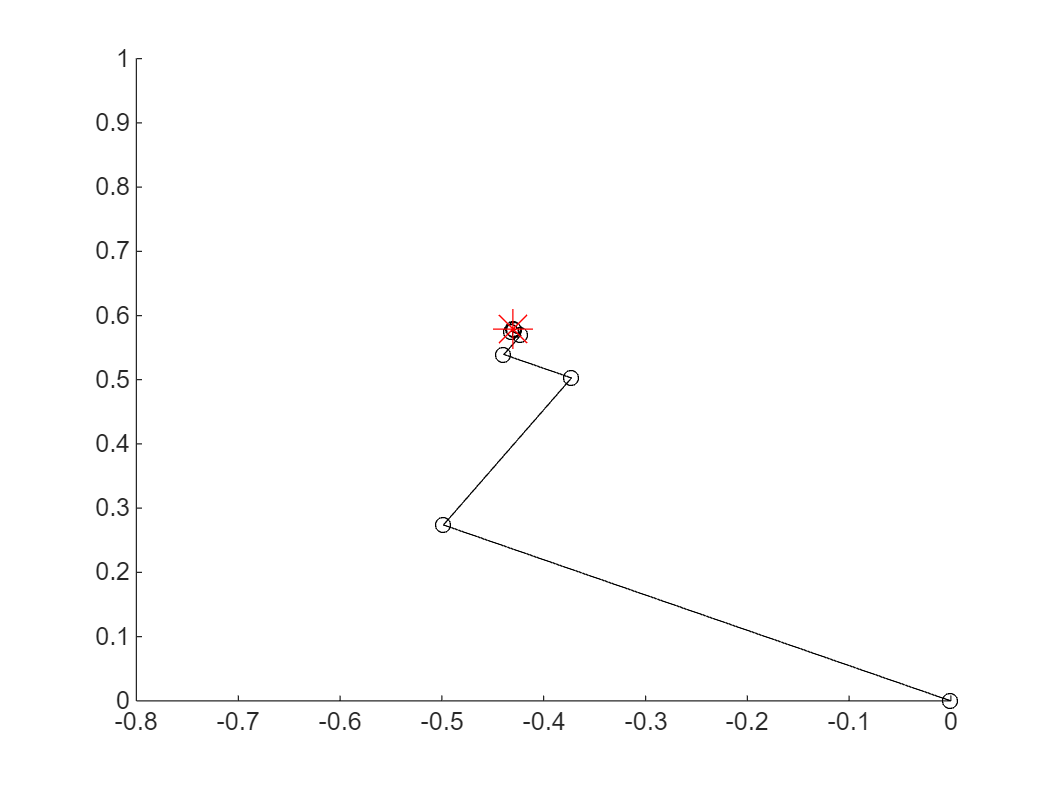

In [25]:
hold(ax,"off");


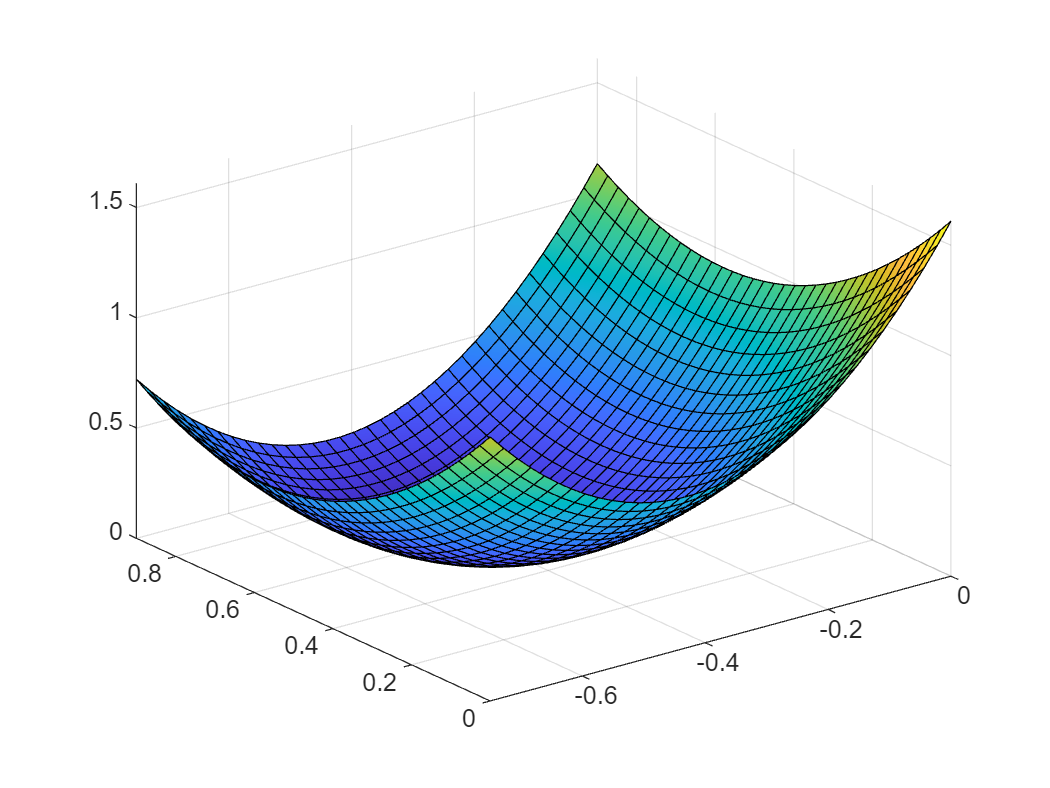

In [26]:
    fsurf(discrepancy_scalar_func,[1.5*x_lim,1.5*y_lim])


Теперь сравним скорость работы итерационного алгоритма и решения при помощи **mldivide**


In [27]:
    tic
    xval=grad_lsqr([0.0; 0.0],residual_function,Jacobian,"mu",0.01,"N",1000)

xval = 2x1    
   -0.4265
    0.5800

In [28]:
toc

Elapsed time is 0.006277 seconds.

In [29]:
tic;
    xval=grad_lsqr_linesearch([0.0; 0.0],residual_function,Jacobian,"mu",0.01,"N",1000)

xval = 2x1    
   -0.4300
    0.5799

In [30]:
toc

Elapsed time is 0.004981 seconds.

In [31]:
tic
    xval = [ones(length(t),1),t]\y % решение задачи классическим способом

xval = 2x1    
   -0.4300
    0.5800

In [32]:
toc

Elapsed time is 0.003166 seconds.

<a name="H_AC8AB610"></a>


In [33]:
function [new_ax,fig_handle] = get_next_ax(index)
% функция, которая возвращает новые оси на новой фигуре
    arguments
        index = []
    end
    persistent N;
    if isempty(index)
        if isempty(N)
            N=1;
        else
            N  = N+1;
        end
        fig_handle = figure(N);
        clf(fig_handle);
        new_ax = axes(fig_handle);
        disp("fig"+ N)
    else
        fig_handle = figure(index);
        clf(fig_handle);
        new_ax = axes(fig_handle);
    end
end